# Comparing classifiers

In this part you will compare the classification algorithms seen in this and the previous labs of MALIS course:

1. K nearest neighbors
2. Logistic regression
3. Neural Networks
4. Support Vector Machine (linear)
5. SVM with RBF kernel
6. Classification Tree

You have only to run the cells and answer the questions you can find after the code

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.simplefilter("ignore")
from sklearn.exceptions import ConvergenceWarning

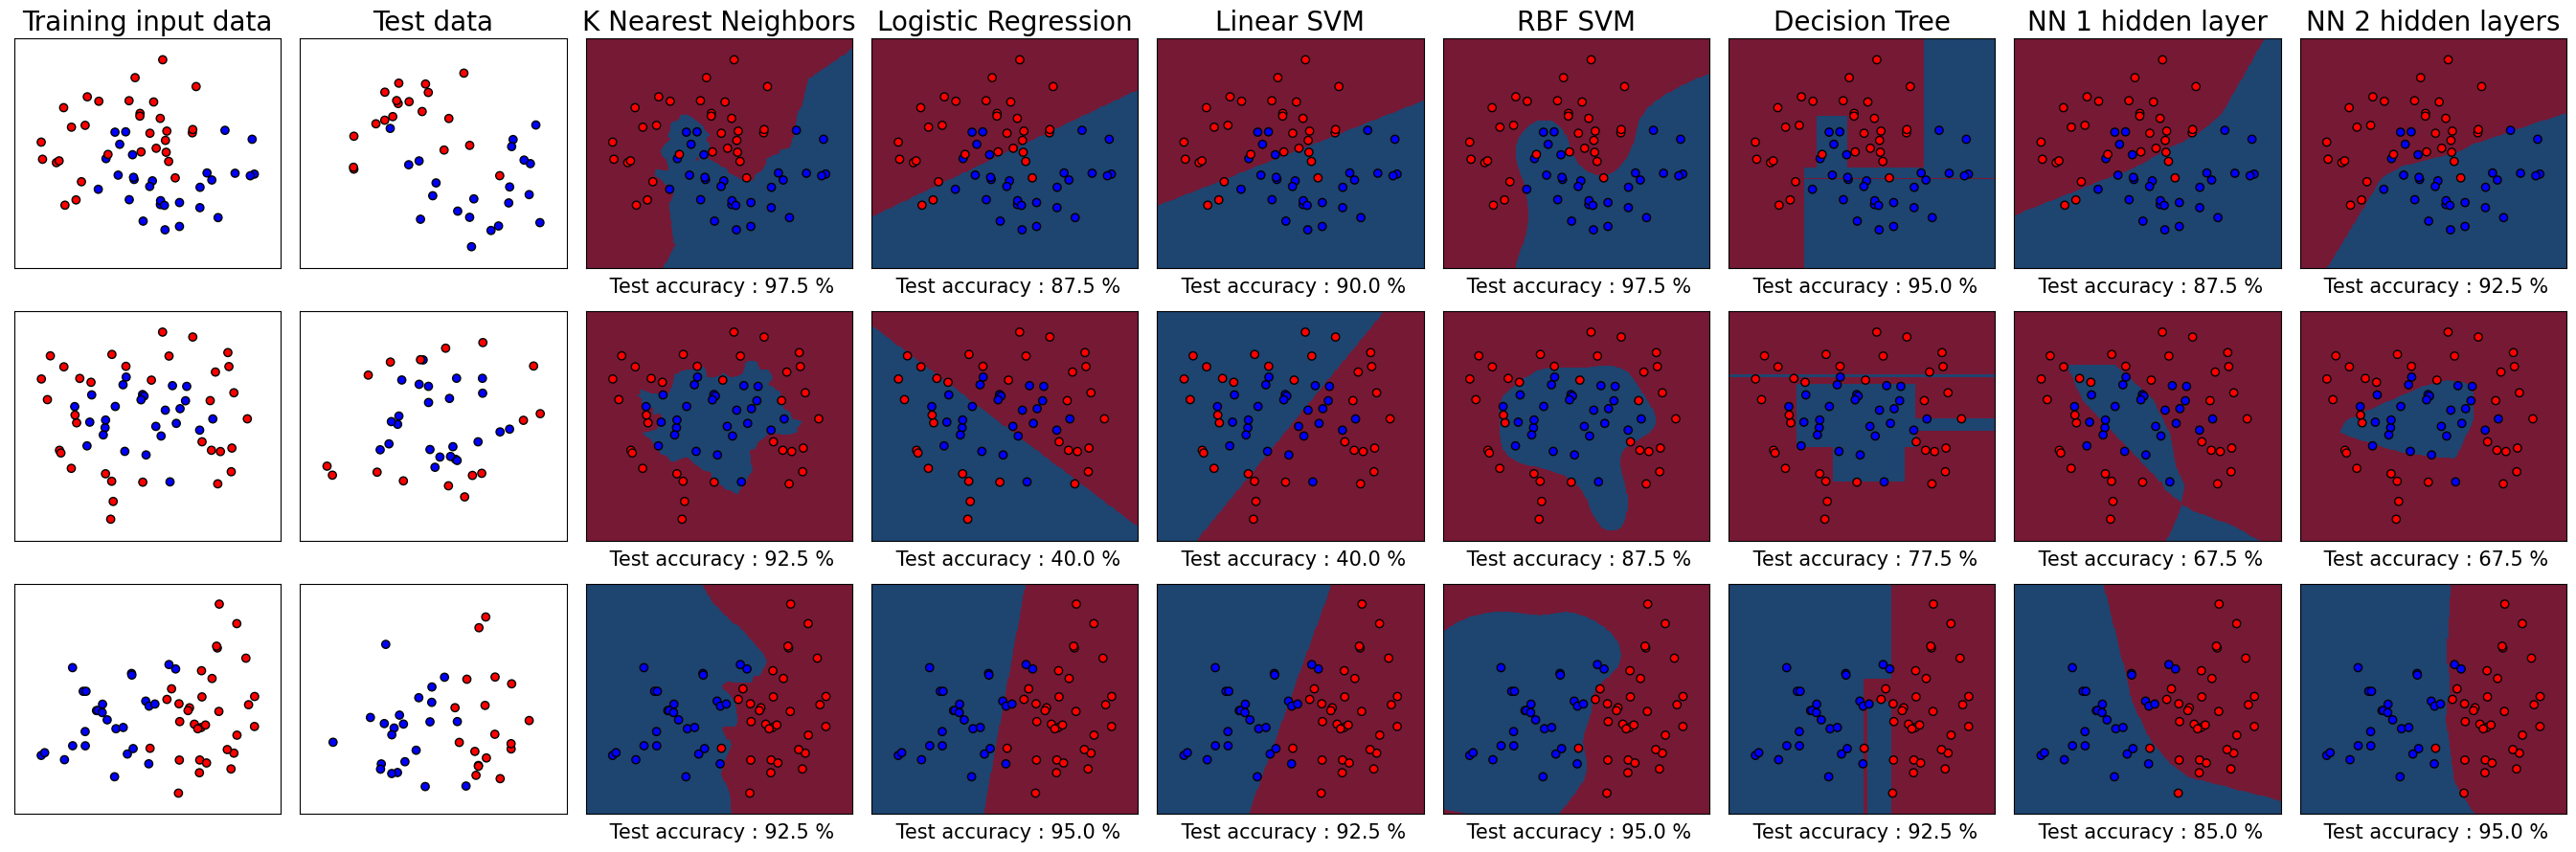

In [11]:
# The following code is not done from scratch, but it is realized using :
# https://github.com/amueller/introduction_to_ml_with_python/blob/master/02-supervised-learning.ipynb

h = .02  # step size in the mesh

# classifier names and classes :
names = ["K Nearest Neighbors", "Logistic Regression", "Linear SVM", "RBF SVM", 
         "Decision Tree", "NN 1 hidden layer","NN 2 hidden layers"]
classifiers = [
    KNeighborsClassifier(3),
    LogisticRegression(solver='liblinear', max_iter=400),
    SVC(kernel="linear", C=2000),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    MLPClassifier(hidden_layer_sizes=(10)),
    MLPClassifier(hidden_layer_sizes=(10,10))]

# set used to train and test
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))

i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    
    # split in train and test
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    
    # plot the training dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 2, i)
    if ds_cnt == 0:
        ax.set_title("Training input data",size=20)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    i += 1
    
    # plot the test dataset
    ax = plt.subplot(len(datasets), len(classifiers) + 2, i)
    if ds_cnt == 0:
        ax.set_title("Test data",size=20)
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 2, i)
        clf.fit(X_train, y_train)

        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].

        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            Z = np.where(Z>=np.mean(Z),1,0)
        else:
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])      

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.pcolormesh(xx, yy, Z, cmap=cm, alpha=0.9)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        
        # Plot the name of the classifier in each column
        if ds_cnt == 0:
            ax.set_title(name,size=20)
        
        # Plot the test accuracy
        ax.set_xlabel((' Test accuracy : %.1f %%' % (100*score)),size=15)
        i += 1

plt.tight_layout()
plt.show()

## Question 1

Comment the results obtained. Use the following questions to help you.
1. Which classifiers performs poorly? In which datasets? Why?
2. Do you think some classifiers are overfitting?
    1. If yes: which ones? in which datasets? which elements allow you to say that?
    2. If no : what you should see to say that a classifier is overfitting?
3. How does changing the parameters may affect the results?
   (changing K in nearest neighbors, the hardness of the SVM, the gamma of the RBF kernel, the depth of the tree, the number of neurons of the Neural Networks)

Your answers here: 

## Which classifiers perform poorly? In which datasets? Why?
 We now compare the performance of the models on the 3 different datasets:
### Dataset 1
We can see that this dataset is not completely linearly separable, but it is almost linearly separable. K-NN (best one), RBF SVM, Decision Tree are the three best models, since they are not tied to a linear decision boundary, thus they are able to predict also the ambiguous points in the middle. As expected, logistic regression and linear SVM perform slightly worse than the previous models. The decision boundaries of the NNs is similar to the ones of logistic regression and linear SVM.
### Dataset 2
We can see that this dataset is not linearly separable, but instead data of the 2 different classes are distributed in a concentric manner. Again here, k-NN is the best model, immediately followed by RBF SVM, since they are able to easily obtain non linear separation surfaces. As expected, logistic regression and linear SVM perform poorly (accuracy 40%), since they are tied to a linear decision boundary.
We can see how the NNs try to learn the concentric shape of the data, but they are not able to do it perfectly, this is probably because of the low amount of neurons used.
Decision tree is somewhere between NNs and K-NN, probably because it is able to learn the concentric shape of the training data, but it is not able to generalize well on the test data
In general, this dataset is more difficult to classify than the previous one.
### Dataset 3
We can see that this dataset is almost linearly separable, thus here all of our models perform well. Furthermore, Logistic Regression here is one of the best models.
## Do you think some classifiers are overfitting ?
We can see that the decision tree tends to overfit in all datasets. We can see it from the plot by looking at the thin surfaces that almost look like small lines, that are generated by the decision tree only for example to classify perfectly all the training data. This is particularly severe for the second dataset, where the accuracy on the test set falls to 77.5 %.

Even if the test accuracy is high (this is because test and training distributions are very similar), also kNN with low values of k tends to overfit, as we can see from the plots, our decision boundaries are very irregular and they tend to follow the training data too much (high variance).

## How does changing the parameters may affect the results?
### kNN

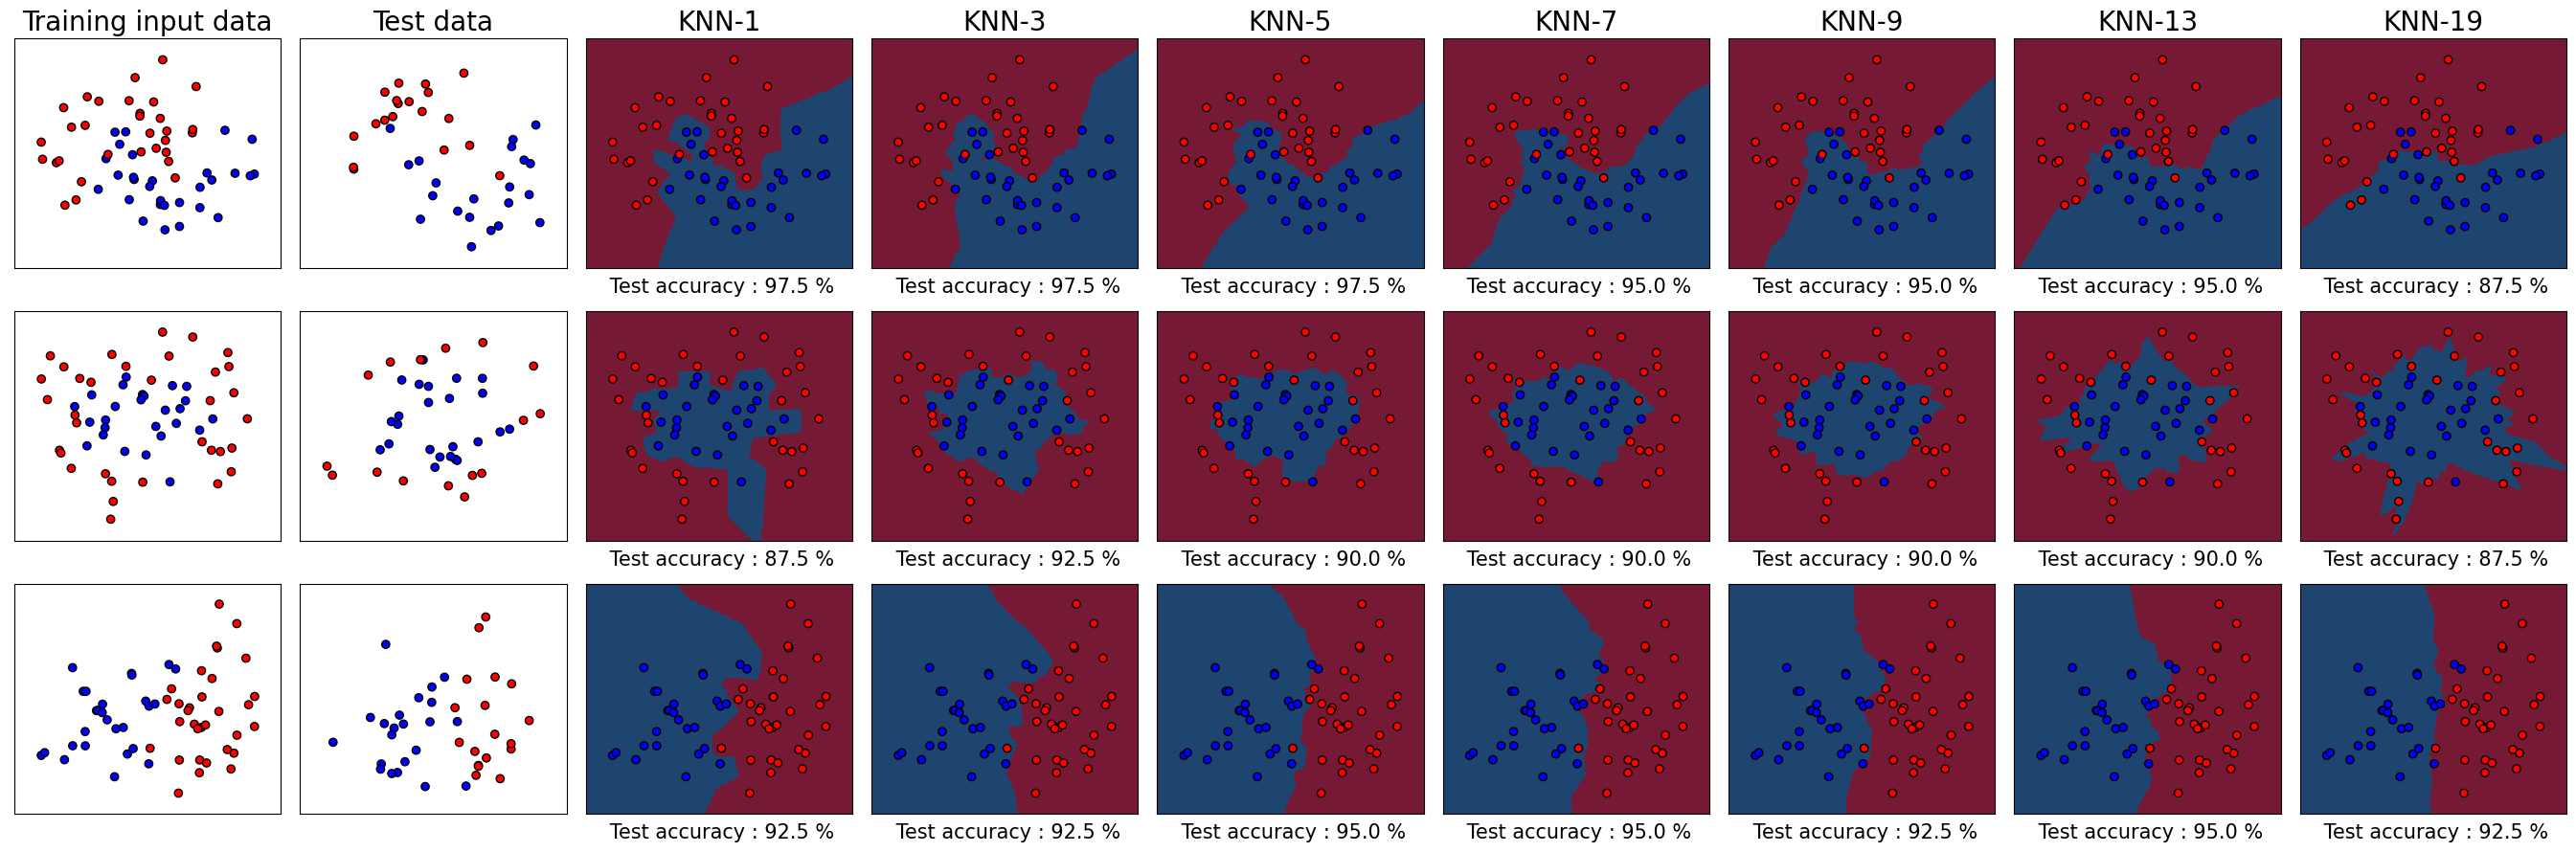

In [4]:
# The following code is not done from scratch, but it is realized using :
# https://github.com/amueller/introduction_to_ml_with_python/blob/master/02-supervised-learning.ipynb

h = .02  # step size in the mesh

# classifier names and classes :
names = ["KNN-1", "KNN-3", "KNN-5", "KNN-7", "KNN-9", "KNN-13", "KNN-19"]
classifiers = [
    KNeighborsClassifier(1),
    KNeighborsClassifier(3),
    KNeighborsClassifier(5),
    KNeighborsClassifier(7),
    KNeighborsClassifier(9),
    KNeighborsClassifier(13),
    KNeighborsClassifier(19)]

# set used to train and test
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))

i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    
    # split in train and test
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    
    # plot the training dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 2, i)
    if ds_cnt == 0:
        ax.set_title("Training input data",size=20)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    i += 1
    
    # plot the test dataset
    ax = plt.subplot(len(datasets), len(classifiers) + 2, i)
    if ds_cnt == 0:
        ax.set_title("Test data",size=20)
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 2, i)
        clf.fit(X_train, y_train)

        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].

        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            Z = np.where(Z>=np.mean(Z),1,0)
        else:
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])      

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.pcolormesh(xx, yy, Z, cmap=cm, alpha=0.9)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        
        # Plot the name of the classifier in each column
        if ds_cnt == 0:
            ax.set_title(name,size=20)
        
        # Plot the test accuracy
        ax.set_xlabel((' Test accuracy : %.1f %%' % (100*score)),size=15)
        i += 1

plt.tight_layout()
plt.show()

Changing the number of neighbors K affects the results in the following way:
- **Increasing K**: The model becomes less complex and therefore less prone to overfitting. It may be able to generalize better (the variance decreases), but if we increase k too much, the model may become too simple, leading to underfitting.
- **Decreasing K**: The model becomes more complex and therefore more prone to overfitting (variance increases).

This can be easily seen from the plots on the third dataset, where we can see that for K=1 our decision boundaries are more complex, even though for our task they seem to be ok (the test accuracy is high). On the other hand, as k grows, we don't reach underfitting, but instead, our model tends to linearly separate the data (k=19), therefore being able to generalize better.

### Linear SVM

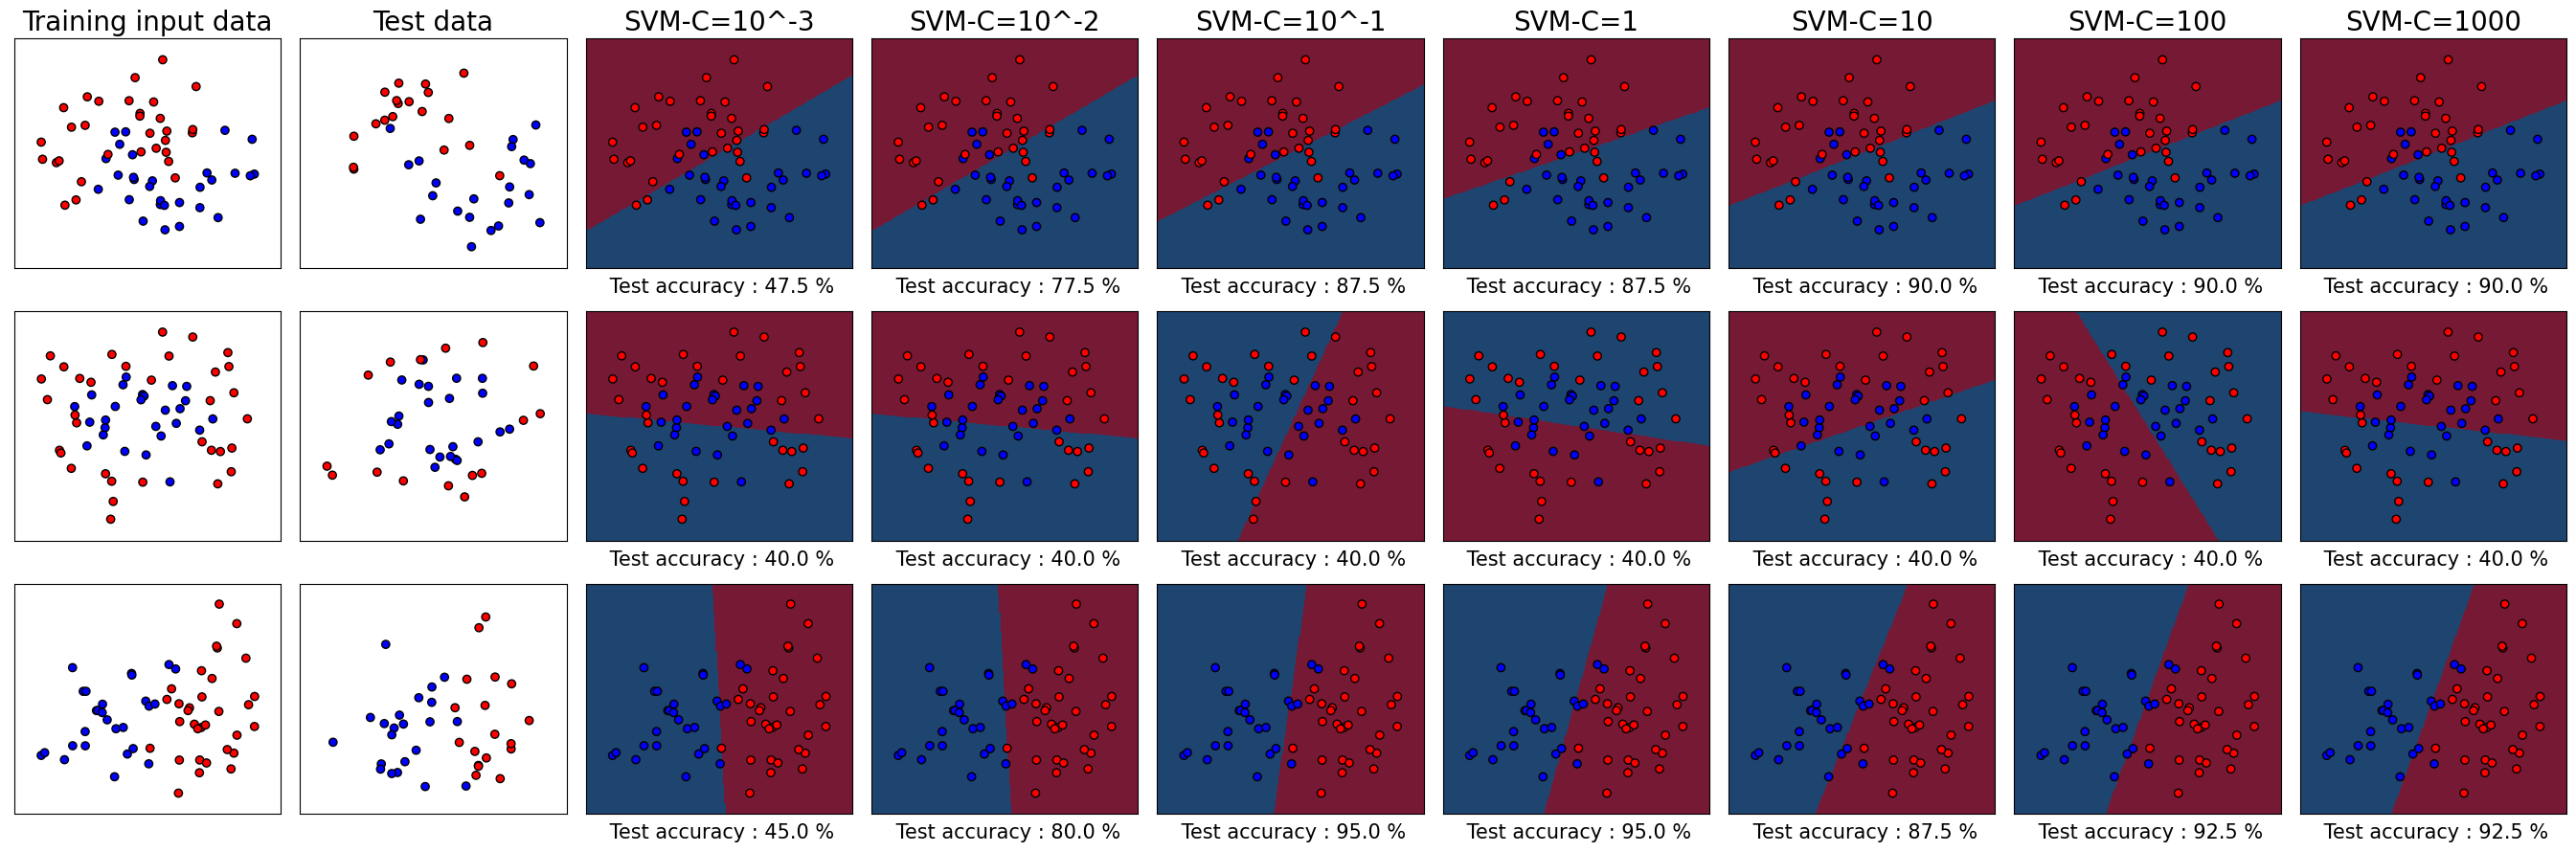

In [5]:
# The following code is not done from scratch, but it is realized using :
# https://github.com/amueller/introduction_to_ml_with_python/blob/master/02-supervised-learning.ipynb

h = .02  # step size in the mesh

# classifier names and classes :
names = ["SVM-C=10^-3", "SVM-C=10^-2", "SVM-C=10^-1", "SVM-C=1", "SVM-C=10", "SVM-C=100", "SVM-C=1000"]
classifiers = [
    SVC(kernel="linear", C=10**-3),
    SVC(kernel="linear", C=10**-2),
    SVC(kernel="linear", C=10**-1),
    SVC(kernel="linear", C=1),
    SVC(kernel="linear", C=10),
    SVC(kernel="linear", C=100),
    SVC(kernel="linear", C=1000),
    ]

# set used to train and test
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))

i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    
    # split in train and test
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    
    # plot the training dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 2, i)
    if ds_cnt == 0:
        ax.set_title("Training input data",size=20)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    i += 1
    
    # plot the test dataset
    ax = plt.subplot(len(datasets), len(classifiers) + 2, i)
    if ds_cnt == 0:
        ax.set_title("Test data",size=20)
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 2, i)
        clf.fit(X_train, y_train)

        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].

        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            Z = np.where(Z>=np.mean(Z),1,0)
        else:
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])      

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.pcolormesh(xx, yy, Z, cmap=cm, alpha=0.9)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        
        # Plot the name of the classifier in each column
        if ds_cnt == 0:
            ax.set_title(name,size=20)
        
        # Plot the test accuracy
        ax.set_xlabel((' Test accuracy : %.1f %%' % (100*score)),size=15)
        i += 1

plt.tight_layout()
plt.show()

Changing the hardness of the SVM affects the results in the following way:
- **Increasing C**: The model becomes more prone to overfitting (variance increases). This happens because the model tries to perfectly classify all the training data since it tries to avoid misclassifications, and therefore it may not generalize well.
- **Decreasing C**: The model becomes less prone to overfitting (variance decreases). This happens because the model is more tolerant to misclassifications in the training data, and therefore it may generalize better. However, if we decrease C too much, the model may become too simple, leading to underfitting.

We can again look at the third dataset to see this behaviour. We can see that as C grows (more penalty to misclassification) our linear separation surfaces rotate, in order to decrease the number of misclassified points in the training data, leading to a smaller margin.

### SVM with RBF kernel

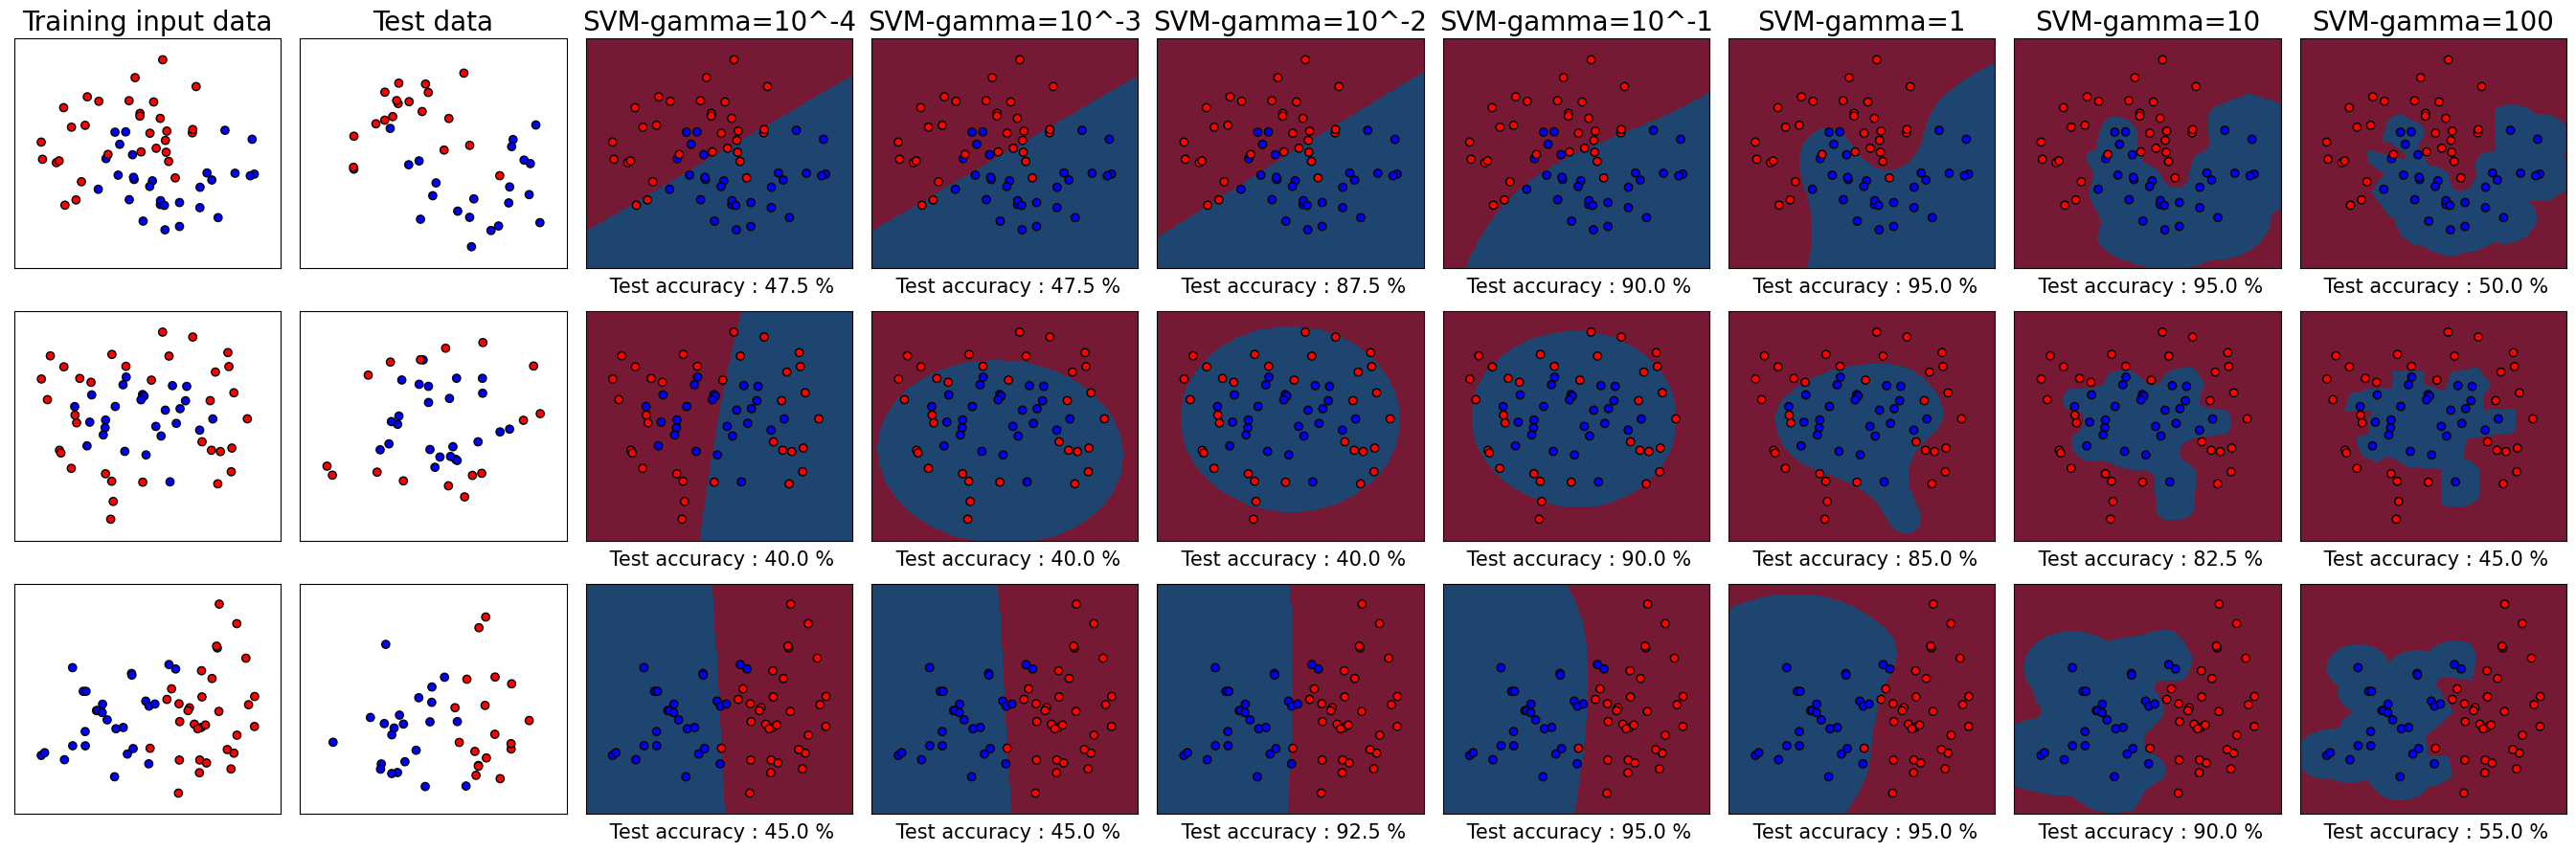

In [9]:
# The following code is not done from scratch, but it is realized using :
# https://github.com/amueller/introduction_to_ml_with_python/blob/master/02-supervised-learning.ipynb

h = .02  # step size in the mesh

# classifier names and classes :
names = ["SVM-gamma=10^-4", "SVM-gamma=10^-3", "SVM-gamma=10^-2", "SVM-gamma=10^-1", "SVM-gamma=1", "SVM-gamma=10", "SVM-gamma=100"]
classifiers = [
    SVC(gamma=10**-4, C=1),
    SVC(gamma=10**-3, C=1),
    SVC(gamma=10**-2, C=1),
    SVC(gamma=10**-1, C=1),
    SVC(gamma=1, C=1),
    SVC(gamma=10, C=1),
    SVC(gamma=100, C=1),
    ]
    

# set used to train and test
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))

i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    
    # split in train and test
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    
    # plot the training dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 2, i)
    if ds_cnt == 0:
        ax.set_title("Training input data",size=20)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    i += 1
    
    # plot the test dataset
    ax = plt.subplot(len(datasets), len(classifiers) + 2, i)
    if ds_cnt == 0:
        ax.set_title("Test data",size=20)
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 2, i)
        clf.fit(X_train, y_train)

        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].

        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            Z = np.where(Z>=np.mean(Z),1,0)
        else:
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])      

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.pcolormesh(xx, yy, Z, cmap=cm, alpha=0.9)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        
        # Plot the name of the classifier in each column
        if ds_cnt == 0:
            ax.set_title(name,size=20)
        
        # Plot the test accuracy
        ax.set_xlabel((' Test accuracy : %.1f %%' % (100*score)),size=15)
        i += 1

plt.tight_layout()
plt.show()

If gamma is too large, the radius of the area of influence of the support vectors only includes the support vector itself and no amount of regularization with C will be able to prevent overfitting.
Also, with a very high gamma, if we look at the decision boundaries of our model, we can see that they are very close to the ones of a 1-NN.

### Decision trees

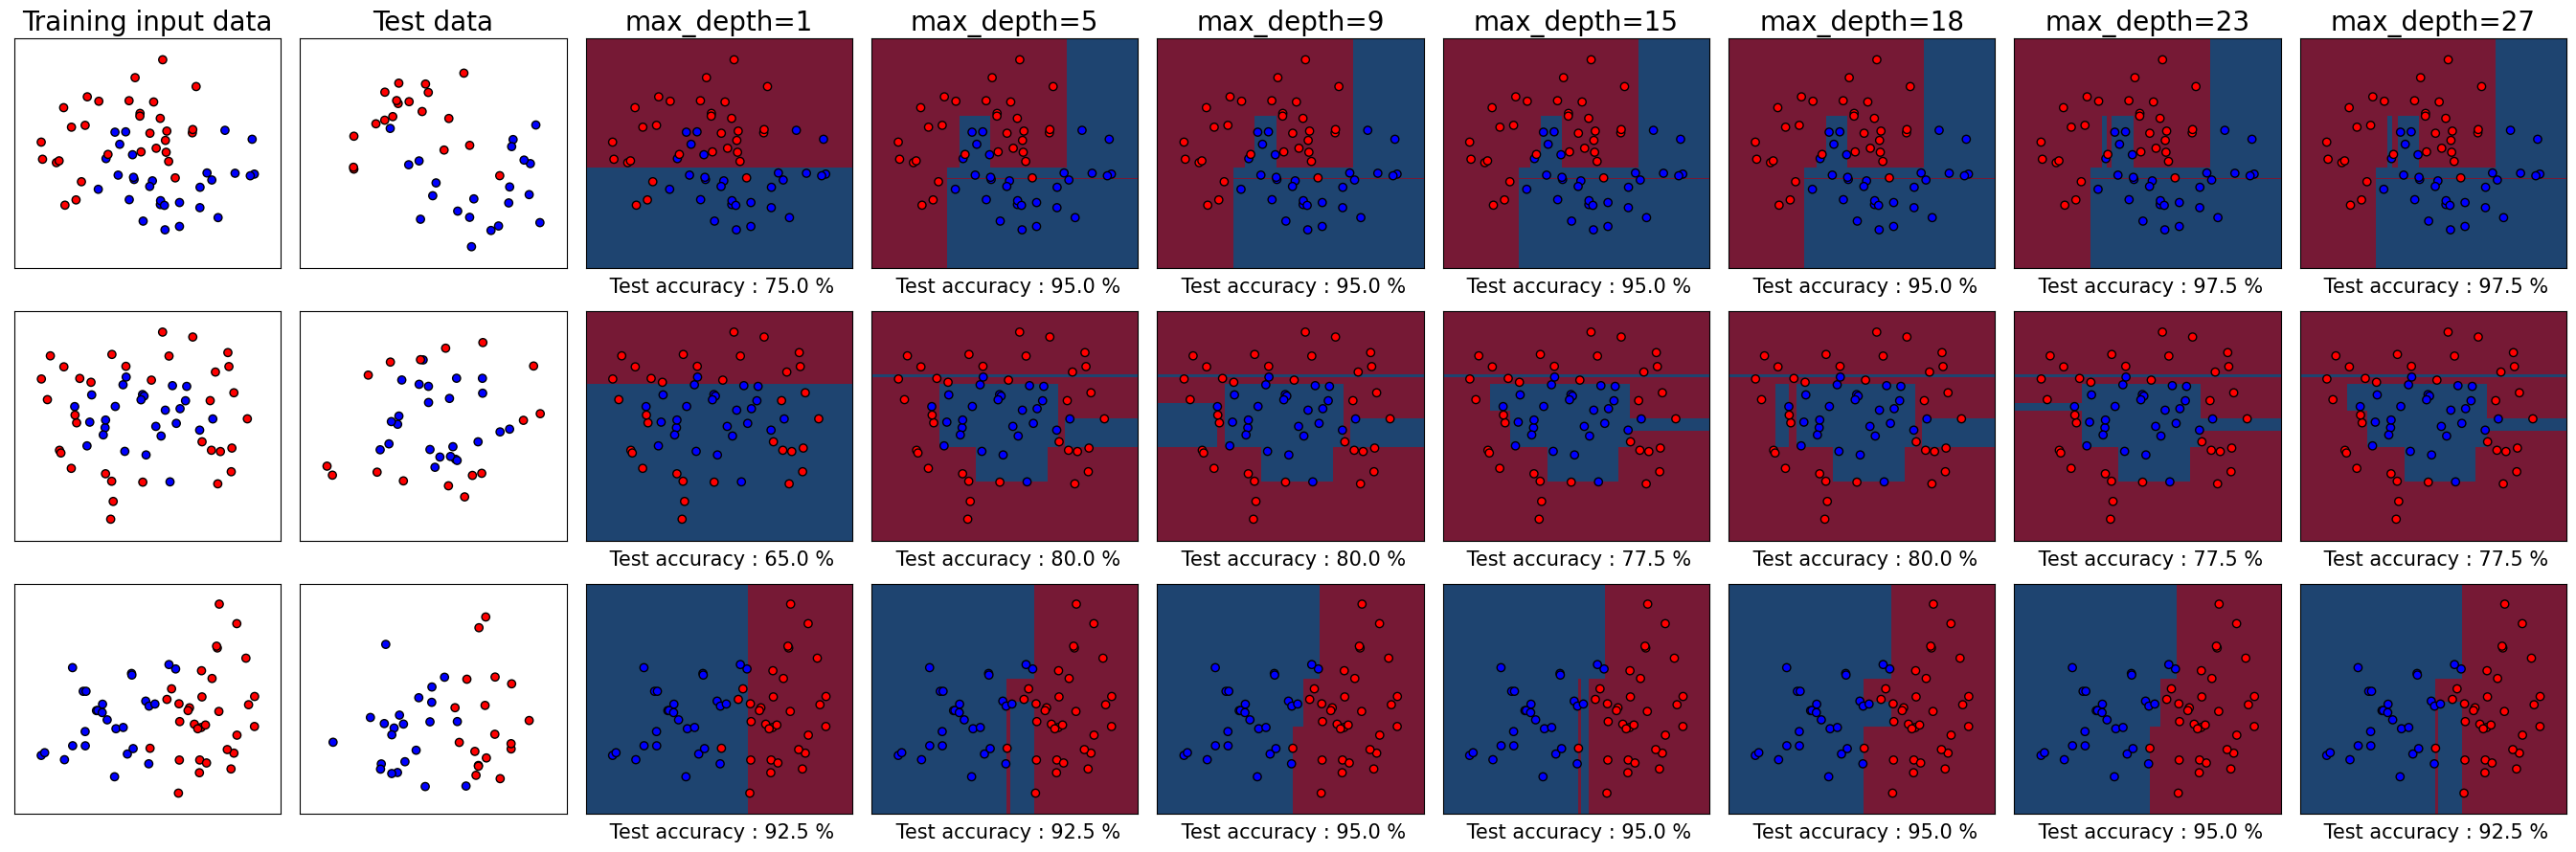

In [11]:
# The following code is not done from scratch, but it is realized using :
# https://github.com/amueller/introduction_to_ml_with_python/blob/master/02-supervised-learning.ipynb

h = .02  # step size in the mesh

# classifier names and classes :
names = ["max_depth=1", "max_depth=5", "max_depth=9", "max_depth=15", "max_depth=18", "max_depth=23", "max_depth=27"]
classifiers = [
    DecisionTreeClassifier(max_depth=1),
    DecisionTreeClassifier(max_depth=5),
    DecisionTreeClassifier(max_depth=9),
    DecisionTreeClassifier(max_depth=15),
    DecisionTreeClassifier(max_depth=18),
    DecisionTreeClassifier(max_depth=23),
    DecisionTreeClassifier(max_depth=27),
    ]
    

# set used to train and test
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))

i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    
    # split in train and test
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    
    # plot the training dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 2, i)
    if ds_cnt == 0:
        ax.set_title("Training input data",size=20)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    i += 1
    
    # plot the test dataset
    ax = plt.subplot(len(datasets), len(classifiers) + 2, i)
    if ds_cnt == 0:
        ax.set_title("Test data",size=20)
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 2, i)
        clf.fit(X_train, y_train)

        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].

        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            Z = np.where(Z>=np.mean(Z),1,0)
        else:
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])      

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.pcolormesh(xx, yy, Z, cmap=cm, alpha=0.9)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        
        # Plot the name of the classifier in each column
        if ds_cnt == 0:
            ax.set_title(name,size=20)
        
        # Plot the test accuracy
        ax.set_xlabel((' Test accuracy : %.1f %%' % (100*score)),size=15)
        i += 1

plt.tight_layout()
plt.show()

- **Increasing the depth**: The model becomes more complex and therefore more prone to overfitting (variance increases). This happens because the model tries to perfectly classify all the training data, and therefore it may not generalize well.
- **Decreasing the depth**: The model becomes less complex and less prone to overfitting (variance decreases). This happens because the model is more tolerant to misclassifications in the training data, and therefore it may generalize better. However, if we decrease the depth too much, the model may become too simple, leading to underfitting.

### Neural Networks

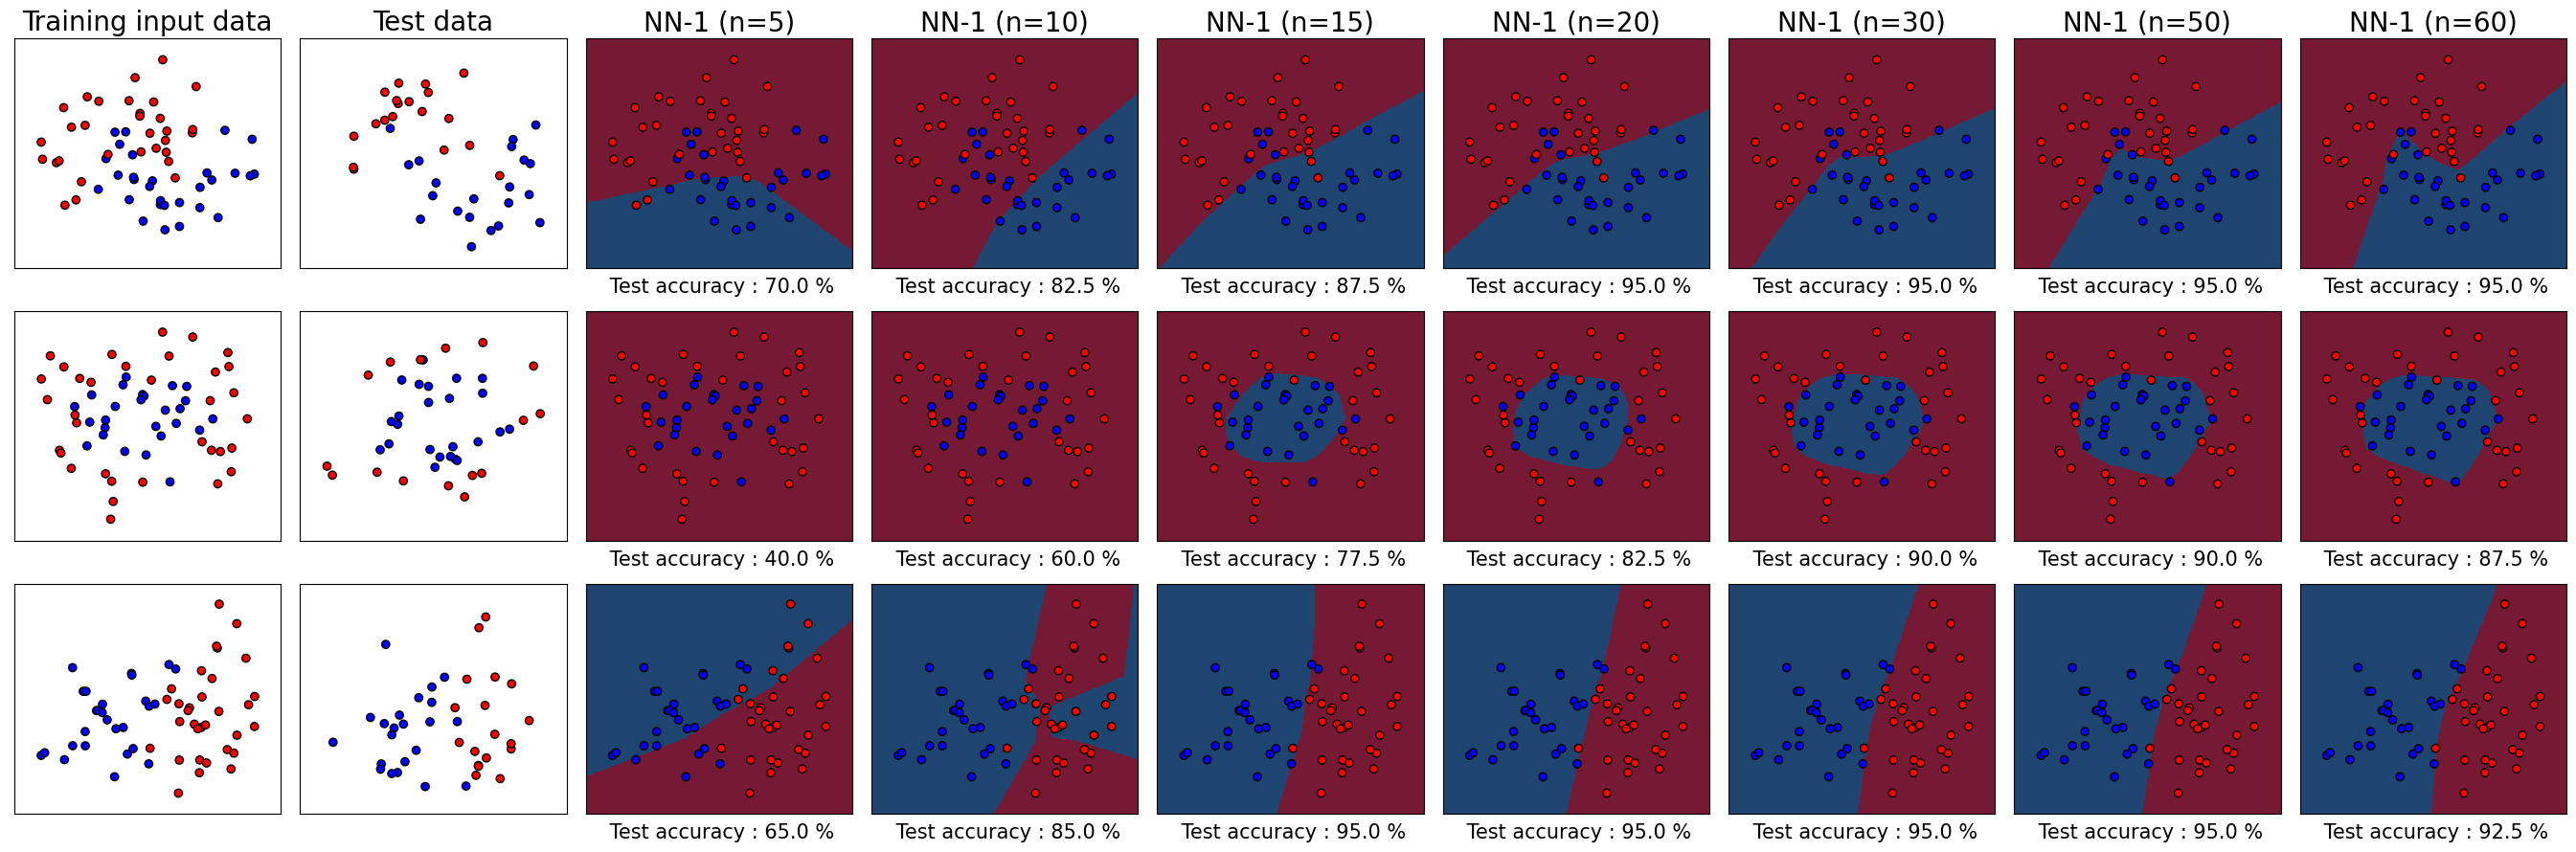

In [15]:
# The following code is not done from scratch, but it is realized using :
# https://github.com/amueller/introduction_to_ml_with_python/blob/master/02-supervised-learning.ipynb

h = .02  # step size in the mesh

# classifier names and classes :
names = ["NN-1 (n=5)", "NN-1 (n=10)", "NN-1 (n=50)", "NN-1 (n=100)", "NN-1 (n=300)", "NN-1 (n=500)", "NN-1 (n=1000)"]
classifiers = [
    MLPClassifier(hidden_layer_sizes=(5)),
    MLPClassifier(hidden_layer_sizes=(10)),
    MLPClassifier(hidden_layer_sizes=(50)),
    MLPClassifier(hidden_layer_sizes=(100)),
    MLPClassifier(hidden_layer_sizes=(300)),
    MLPClassifier(hidden_layer_sizes=(500)),
    MLPClassifier(hidden_layer_sizes=(1000)),
    ]

# set used to train and test
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))

i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    
    # split in train and test
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    
    # plot the training dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 2, i)
    if ds_cnt == 0:
        ax.set_title("Training input data",size=20)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    i += 1
    
    # plot the test dataset
    ax = plt.subplot(len(datasets), len(classifiers) + 2, i)
    if ds_cnt == 0:
        ax.set_title("Test data",size=20)
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 2, i)
        clf.fit(X_train, y_train)

        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].

        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            Z = np.where(Z>=np.mean(Z),1,0)
        else:
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])      

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.pcolormesh(xx, yy, Z, cmap=cm, alpha=0.9)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        
        # Plot the name of the classifier in each column
        if ds_cnt == 0:
            ax.set_title(name,size=20)
        
        # Plot the test accuracy
        ax.set_xlabel((' Test accuracy : %.1f %%' % (100*score)),size=15)
        i += 1

plt.tight_layout()
plt.show()

We used a neural network with one hidden layer and we tried with different numbers of neurons.
- **Increasing the number of neurons**: The model becomes more complex, it understands better how the traning data is distribuited leading to better test accuracies (in our task the traning set is similarly distribuited to the test set). As downside, an high amount of neurons is more prone to overfitting (variance increases). This happens because the model tries to perfectly classify all the training data, and therefore it may not generalize well.
- **Decreasing the number of neurons**: The model becomes less complex and less prone to overfitting (variance decreases) but it also leads to an higher bias. This is because our model with a low amount of neurons is not able to understand well how the traning data is distribuited, leading to worse test accuracies.